In [34]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# Loading cleaned datasets
df_1 = pd.read_csv('cleaned_historical_arrears_data_1.csv')
df_2 = pd.read_csv('cleaned_historical_arrears_data_2.csv')

In [36]:
# Summary statistics
print("Summary statistics for df_1:")
print(df_1.describe())
print("Summary statistics for df_2:")
print(df_2.describe())

Summary statistics for df_1:
       Contract_Term  Cost_Amount_GBP  Exposure_Amount_GBP  \
count  700000.000000    700000.000000        700000.000000   
mean       53.926187    451108.895945         35004.808022   
std        24.562205    259784.396789         19626.803105   
min        12.000000      1002.090000          1000.000000   
25%        33.000000    226039.162500         18017.852500   
50%        54.000000    451045.955000         35022.590000   
75%        75.000000    676289.630000         51992.165000   
max        96.000000    900898.520000         68999.870000   

       Forbearance_Amount_GBP  Late_Payment_Fees_GBP  Total_Arrears_GBP  
count           700000.000000          700000.000000      700000.000000  
mean              1001.167554             494.703682        9854.786624  
std                576.872389             285.990378        5685.969703  
min                  0.000000               0.010000           0.020000  
25%                501.960000             

In [37]:
# Ensuring the data is clean before proceeding
print(df_1.info())
print(df_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer_ID             700000 non-null  object 
 1   Contract_Term           700000 non-null  int64  
 2   Cost_Amount_GBP         700000 non-null  float64
 3   Regulatory_Compliance   700000 non-null  object 
 4   Customer_Category       700000 non-null  object 
 5   Exposure_Amount_GBP     700000 non-null  float64
 6   Contract_Status         700000 non-null  object 
 7   Assistance_Flag         700000 non-null  object 
 8   Risk_Flag               700000 non-null  object 
 9   Payment_Status          700000 non-null  object 
 10  Forbearance_Amount_GBP  700000 non-null  float64
 11  Payment_Interval        700000 non-null  object 
 12  Late_Payment_Fees_GBP   700000 non-null  float64
 13  Total_Arrears_GBP       700000 non-null  float64
dtypes: float64(5), int64

In [38]:
# Converting numeric columns to appropriate data types
numeric_features = ['Contract_Term', 'Cost_Amount_GBP', 'Exposure_Amount_GBP', 'Forbearance_Amount_GBP', 'Late_Payment_Fees_GBP', 'Total_Arrears_GBP']

for feature in numeric_features:
    df_1[feature] = pd.to_numeric(df_1[feature]) #, errors='coerce')
    df_2[feature] = pd.to_numeric(df_2[feature]) #, errors='coerce')

In [39]:
# Dropping rows with NaN values resulted from conversion
df_1.dropna(subset=numeric_features, inplace=True)
df_2.dropna(subset=numeric_features, inplace=True)

In [40]:
# Ensuring the data is clean before proceeding
print(df_1.info())
print(df_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer_ID             700000 non-null  object 
 1   Contract_Term           700000 non-null  int64  
 2   Cost_Amount_GBP         700000 non-null  float64
 3   Regulatory_Compliance   700000 non-null  object 
 4   Customer_Category       700000 non-null  object 
 5   Exposure_Amount_GBP     700000 non-null  float64
 6   Contract_Status         700000 non-null  object 
 7   Assistance_Flag         700000 non-null  object 
 8   Risk_Flag               700000 non-null  object 
 9   Payment_Status          700000 non-null  object 
 10  Forbearance_Amount_GBP  700000 non-null  float64
 11  Payment_Interval        700000 non-null  object 
 12  Late_Payment_Fees_GBP   700000 non-null  float64
 13  Total_Arrears_GBP       700000 non-null  float64
dtypes: float64(5), int64

In [41]:
# Dropping the Customer_ID column for exploration
df_1_exploration = df_1.drop(columns=['Customer_ID'])
df_2_exploration = df_2.drop(columns=['Customer_ID'])

In [42]:
# Encoding categorical variables
categorical_features = df_1_exploration.select_dtypes(include=['object']).columns

for feature in categorical_features:
    df_1_exploration[feature] = df_1_exploration[feature].astype('category').cat.codes
    df_2_exploration[feature] = df_2_exploration[feature].astype('category').cat.codes

In [43]:
# Ensure the data is clean before proceeding
print(df_1_exploration.info())
print(df_2_exploration.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Contract_Term           700000 non-null  int64  
 1   Cost_Amount_GBP         700000 non-null  float64
 2   Regulatory_Compliance   700000 non-null  int8   
 3   Customer_Category       700000 non-null  int8   
 4   Exposure_Amount_GBP     700000 non-null  float64
 5   Contract_Status         700000 non-null  int8   
 6   Assistance_Flag         700000 non-null  int8   
 7   Risk_Flag               700000 non-null  int8   
 8   Payment_Status          700000 non-null  int8   
 9   Forbearance_Amount_GBP  700000 non-null  float64
 10  Payment_Interval        700000 non-null  int8   
 11  Late_Payment_Fees_GBP   700000 non-null  float64
 12  Total_Arrears_GBP       700000 non-null  float64
dtypes: float64(5), int64(1), int8(7)
memory usage: 36.7 MB
None
<class 'pandas

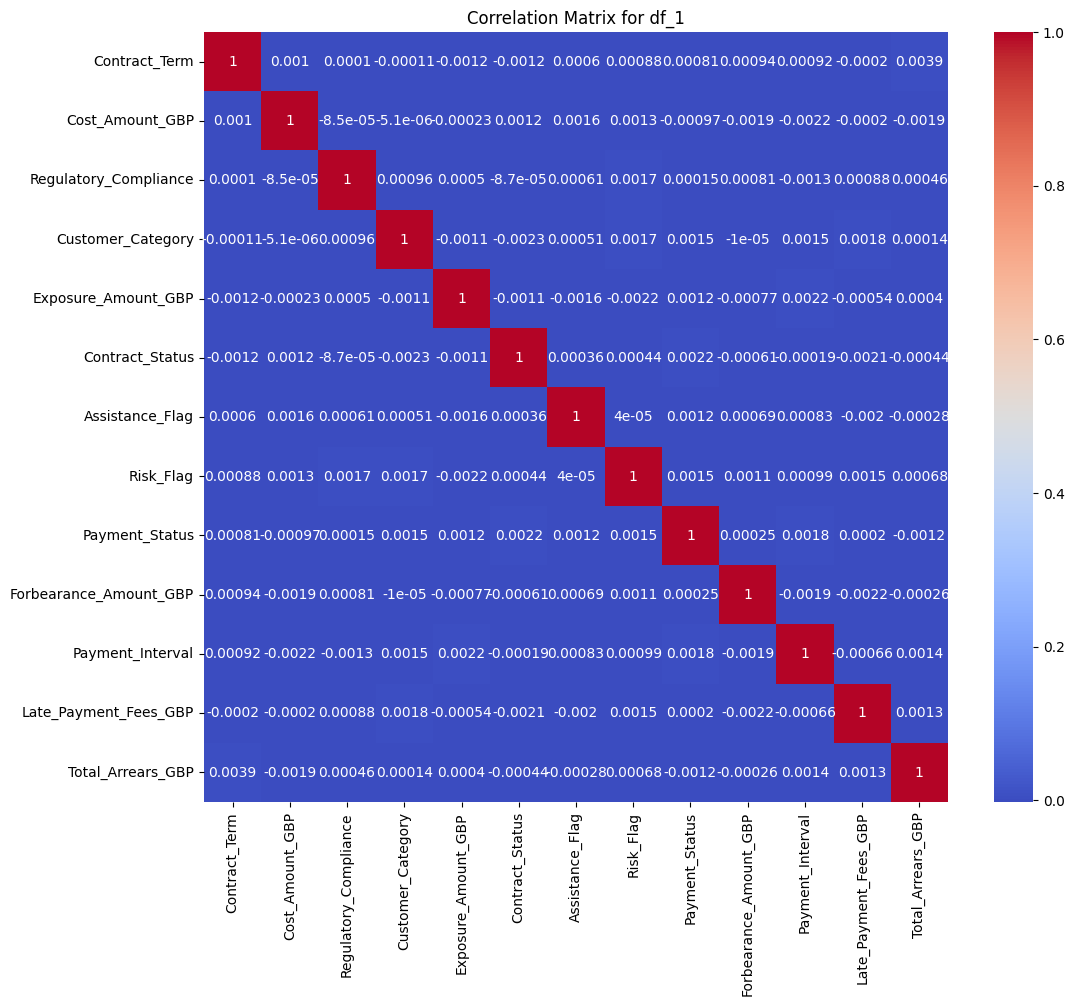

In [44]:
# Plotting correlations for df_1
plt.figure(figsize=(12, 10))
sns.heatmap(df_1_exploration.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for df_1')
plt.show()

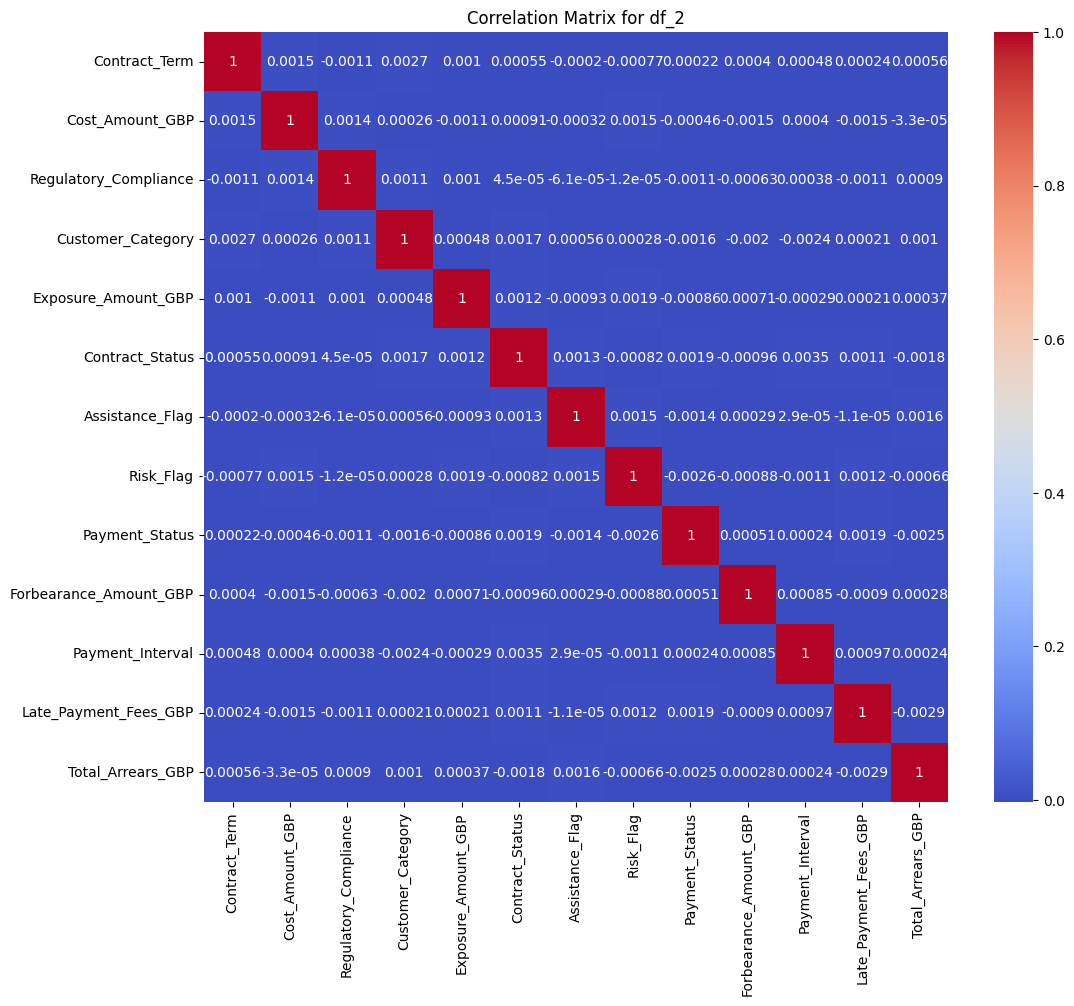

In [45]:
# Plotting correlations for df_2
plt.figure(figsize=(12, 10))
sns.heatmap(df_2_exploration.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for df_2')
plt.show()

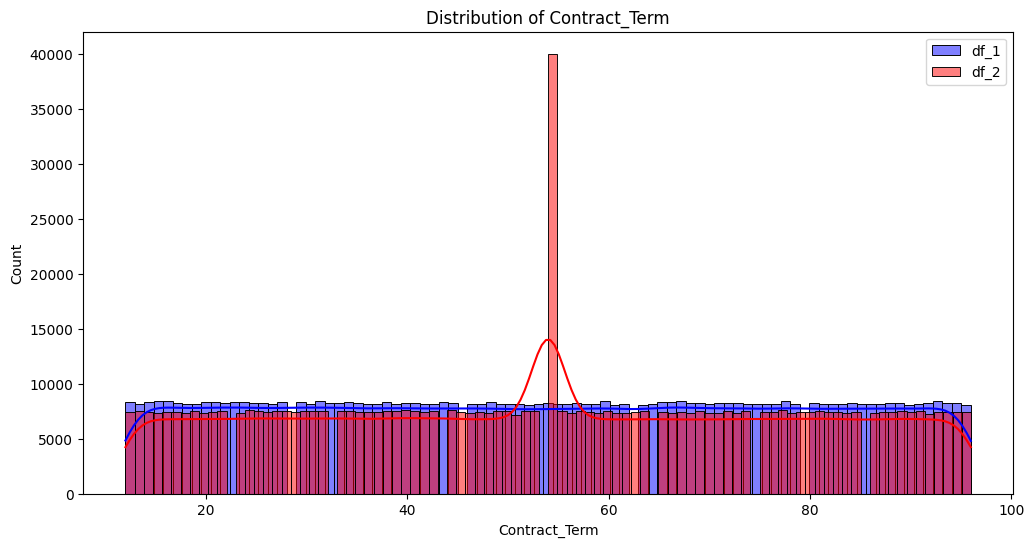

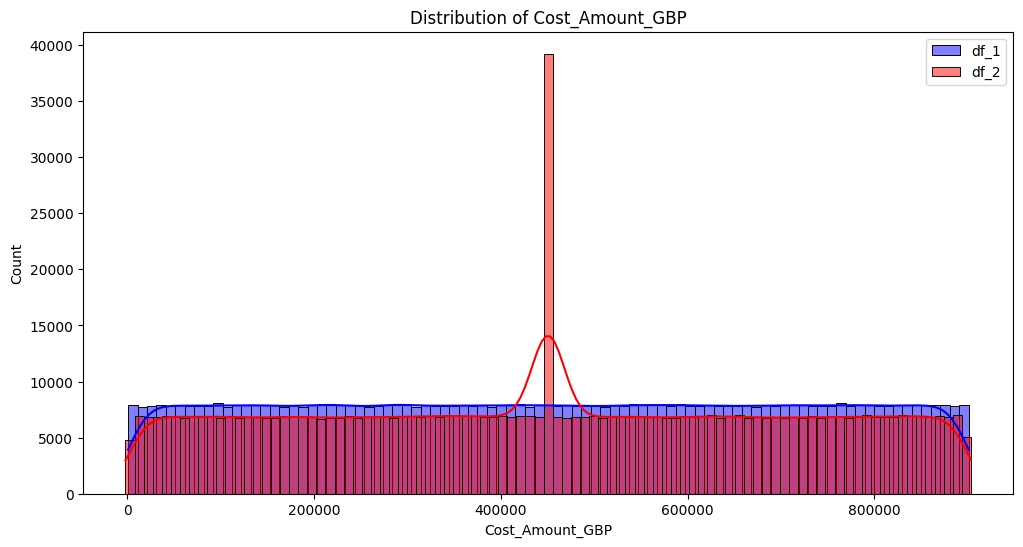

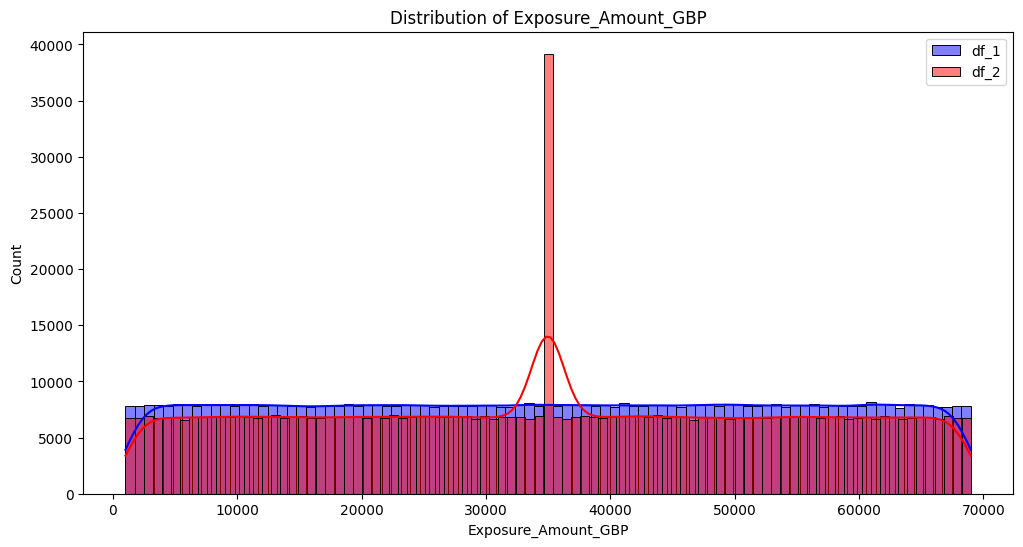

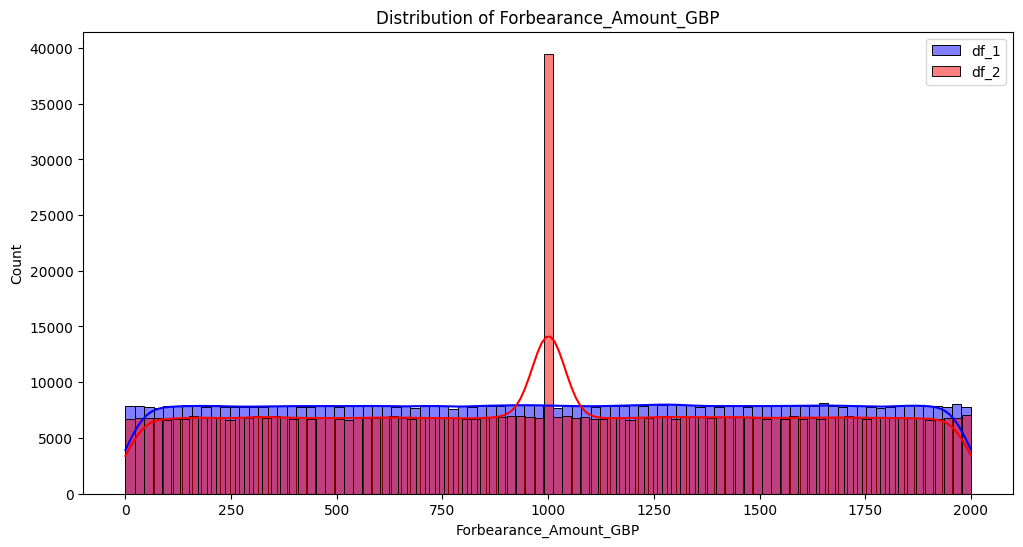

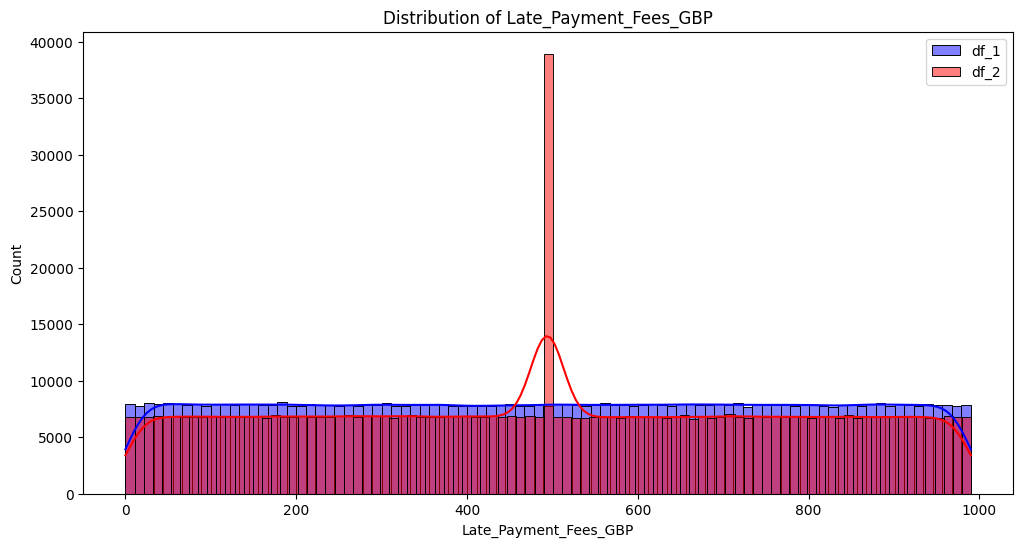

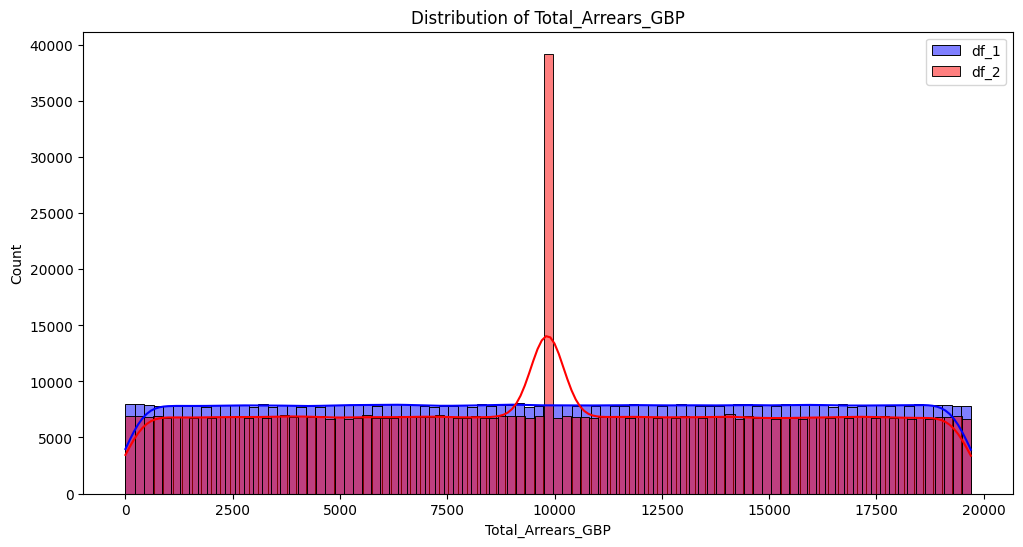

In [48]:
# Plotting distributions for numeric features
for feature in numeric_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_1_exploration[feature], kde=True, color='blue', label='df_1')
    sns.histplot(df_2_exploration[feature], kde=True, color='red', label='df_2')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()

In [49]:
# Descriptive statistics for df_1_exploration
desc_stats_df1 = df_1_exploration.describe()
print("Descriptive Statistics for df_1_exploration:")
print(desc_stats_df1)

Descriptive Statistics for df_1_exploration:
       Contract_Term  Cost_Amount_GBP  Regulatory_Compliance  \
count  700000.000000    700000.000000          700000.000000   
mean       53.926187    451108.895945               0.499819   
std        24.562205    259784.396789               0.500000   
min        12.000000      1002.090000               0.000000   
25%        33.000000    226039.162500               0.000000   
50%        54.000000    451045.955000               0.000000   
75%        75.000000    676289.630000               1.000000   
max        96.000000    900898.520000               1.000000   

       Customer_Category  Exposure_Amount_GBP  Contract_Status  \
count      700000.000000        700000.000000    700000.000000   
mean            2.000129         35004.808022         0.999934   
std             1.413563         19626.803105         0.816825   
min             0.000000          1000.000000         0.000000   
25%             1.000000         18017.852500   

In [50]:
# Descriptive statistics for df_2_exploration
desc_stats_df2 = df_2_exploration.describe()
print("\nDescriptive Statistics for df_2_exploration:")
print(desc_stats_df2)


Descriptive Statistics for df_2_exploration:
       Contract_Term  Cost_Amount_GBP  Regulatory_Compliance  \
count  665735.000000    665735.000000          665735.000000   
mean       53.957059    451186.106935               0.525476   
std        23.928328    253456.889593               0.499351   
min        12.000000     -1830.935263               0.000000   
25%        34.000000    238157.934420               0.000000   
50%        54.000000    450722.720080               1.000000   
75%        74.000000    664448.249309               1.000000   
max        96.000000    903374.830076               1.000000   

       Customer_Category  Exposure_Amount_GBP  Contract_Status  \
count      665735.000000        665735.000000    665735.000000   
mean            1.760511         34975.076581         1.000361   
std             1.305029         19133.983528         0.795961   
min             0.000000          1000.020000         0.000000   
25%             1.000000         18865.240000  

In [51]:
# Comparing means and standard deviations
mean_df1 = df_1_exploration.mean()
std_df1 = df_1_exploration.std()
mean_df2 = df_2_exploration.mean()
std_df2 = df_2_exploration.std()

comparison_stats = pd.DataFrame({'Mean_df1': mean_df1, 'Std_df1': std_df1, 'Mean_df2': mean_df2, 'Std_df2': std_df2})
print("Comparison of Means and Standard Deviations:")
print(comparison_stats)

Comparison of Means and Standard Deviations:
                             Mean_df1        Std_df1       Mean_df2  \
Contract_Term               53.926187      24.562205      53.957059   
Cost_Amount_GBP         451108.895945  259784.396789  451186.106935   
Regulatory_Compliance        0.499819       0.500000       0.525476   
Customer_Category            2.000129       1.413563       1.760511   
Exposure_Amount_GBP      35004.808022   19626.803105   34975.076581   
Contract_Status              0.999934       0.816825       1.000361   
Assistance_Flag              0.499774       0.500000       0.524398   
Risk_Flag                    0.499717       0.500000       0.524509   
Payment_Status               1.000201       0.816557       0.951221   
Forbearance_Amount_GBP    1001.167554     576.872389    1000.715942   
Payment_Interval             0.998293       0.816447       0.950626   
Late_Payment_Fees_GBP      494.703682     285.990378     494.545349   
Total_Arrears_GBP         9854.7

In [53]:
# Aligning the dataframes to have the same number of rows
min_rows = min(len(df_1_exploration), len(df_2_exploration))
df_1_exploration = df_1_exploration.iloc[:min_rows]
df_2_exploration = df_2_exploration.iloc[:min_rows]

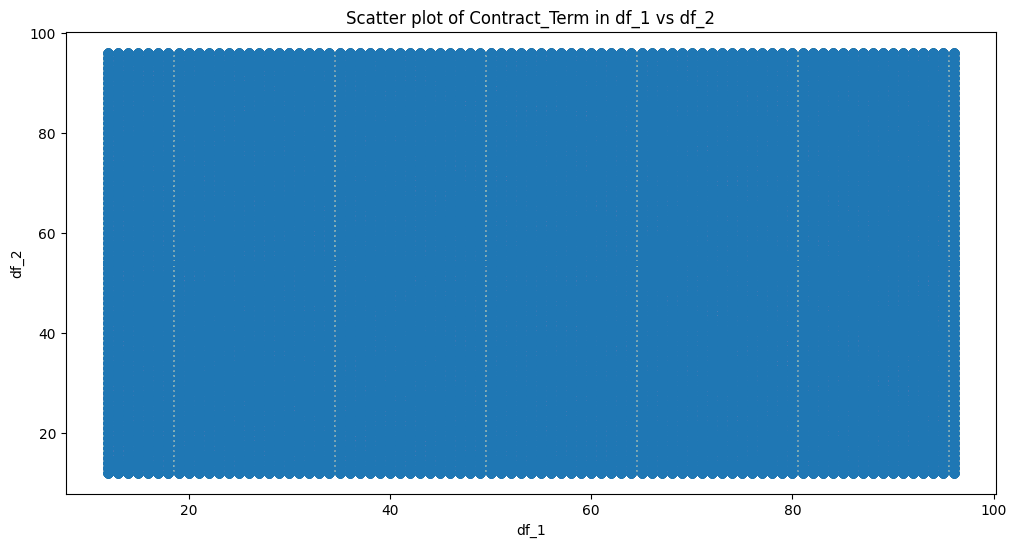

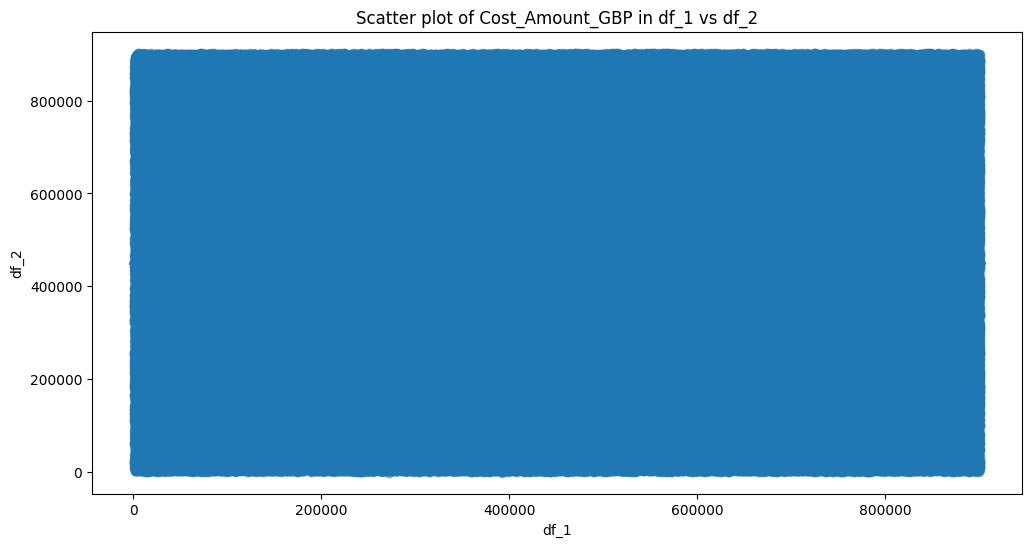

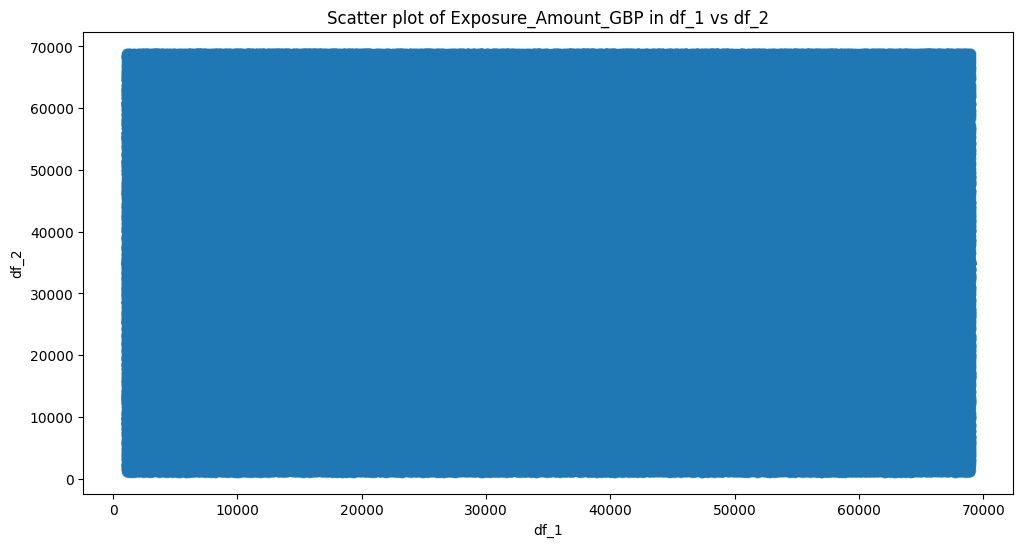

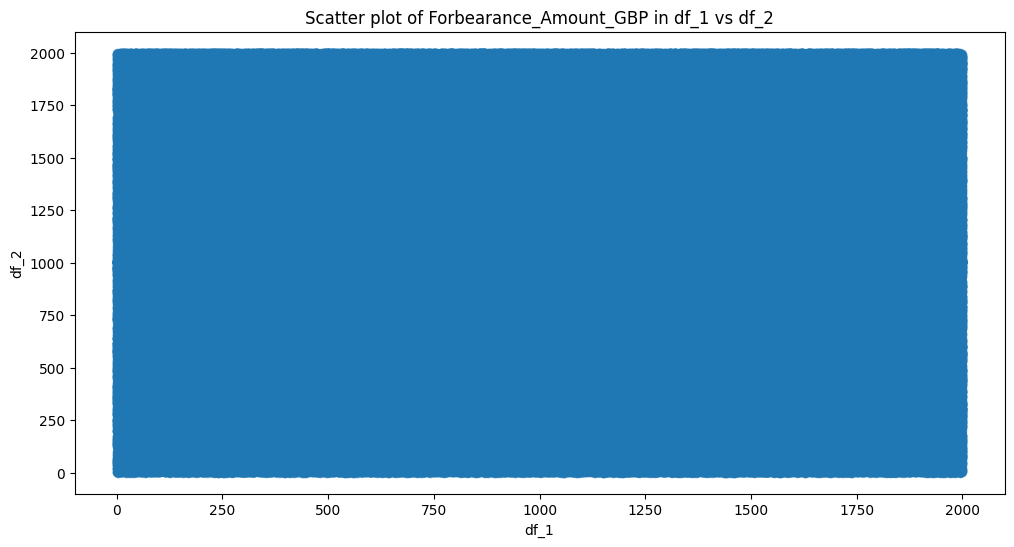

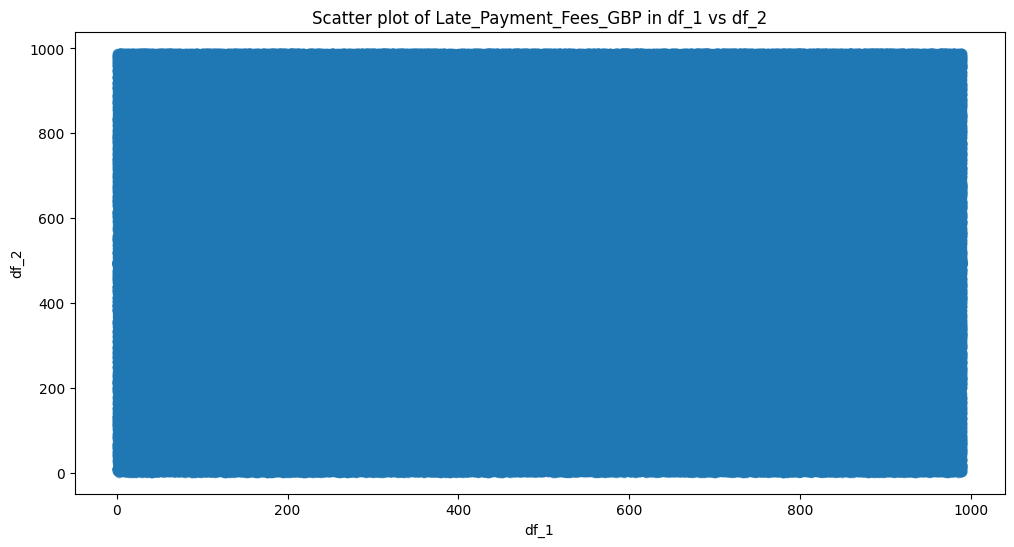

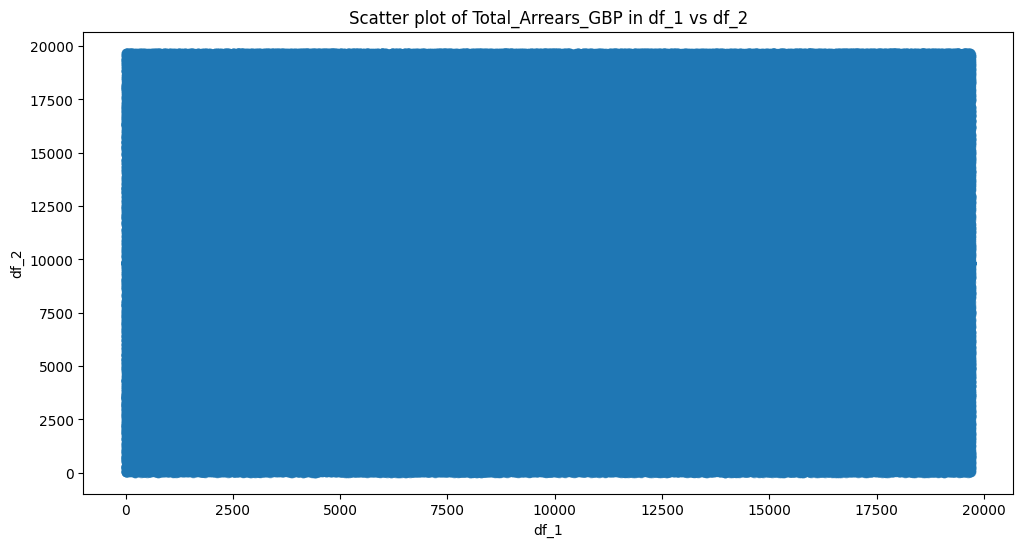

In [54]:
# Scatter plots to visually inspect noise
for feature in numeric_features:
    plt.figure(figsize=(12, 6))
    plt.scatter(df_1_exploration[feature], df_2_exploration[feature], alpha=0.5)
    plt.title(f'Scatter plot of {feature} in df_1 vs df_2')
    plt.xlabel('df_1')
    plt.ylabel('df_2')
    plt.show()

In [59]:
# imports for data preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [60]:
# Defining target variable
target_variable = 'Total_Arrears_GBP'

# Encoding categorical features
categorical_features = df_1.select_dtypes(include=['object']).columns
label_encoders = {}
for feature in categorical_features:
    if feature != target_variable:
        label_encoders[feature] = LabelEncoder()
        df_1[feature] = label_encoders[feature].fit_transform(df_1[feature])
        df_2[feature] = label_encoders[feature].fit_transform(df_2[feature])

In [61]:
# Encoding target variable if (or in case) it's categorical
if df_1[target_variable].dtype == 'object':
    label_encoders[target_variable] = LabelEncoder()
    df_1[target_variable] = label_encoders[target_variable].fit_transform(df_1[target_variable])
    df_2[target_variable] = label_encoders[target_variable].fit_transform(df_2[target_variable])

In [62]:
# Scaling numerical features
numeric_features = df_1.select_dtypes(include=[np.number]).columns.drop(target_variable)

scaler = StandardScaler()
df_1[numeric_features] = scaler.fit_transform(df_1[numeric_features])
df_2[numeric_features] = scaler.transform(df_2[numeric_features])

In [63]:
# Splitting the data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_1.drop(target_variable, axis=1), df_1[target_variable], test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_2.drop(target_variable, axis=1), df_2[target_variable], test_size=0.2, random_state=42)

print(f'Training data shape for df_1: {X_train_1.shape}')
print(f'Testing data shape for df_1: {X_test_1.shape}')
print(f'Training data shape for df_2: {X_train_2.shape}')
print(f'Testing data shape for df_2: {X_test_2.shape}')

Training data shape for df_1: (560000, 13)
Testing data shape for df_1: (140000, 13)
Training data shape for df_2: (532588, 13)
Testing data shape for df_2: (133147, 13)
